In [ ]:
!pip install tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 43.9 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
!unzip Parsed_Not_Capuchinbird_Clips.zip

Archive:  Parsed_Not_Capuchinbird_Clips.zip
   creating: Parsed_Not_Capuchinbird_Clips/
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-1.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-10.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-11.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-12.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-13.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-14.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-15.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-16.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-17.wav  
  inflating: Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-18.wav  
 

In [ ]:
!unzip Parsed_Capuchinbird_Clips.zip

Archive:  Parsed_Capuchinbird_Clips.zip
   creating: Parsed_Capuchinbird_Clips/
  inflating: Parsed_Capuchinbird_Clips/XC114131-0.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114131-1.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114131-2.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114131-3.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114131-4.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-0.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-1.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-2.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-3.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-4.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-5.wav  
  inflating: Parsed_Capuchinbird_Clips/XC114132-6.wav  
  inflating: Parsed_Capuchinbird_Clips/XC119294-0.wav  
  inflating: Parsed_Capuchinbird_Clips/XC16803-0.wav  
  inflating: Parsed_Capuchinbird_Clips/XC16803-1.wav  
  inflating: Parsed_Capuchinbird_Clips/XC16803-2.wav  
  inflating: Parsed_Capuchi

In [ ]:
!unzip Forest_Recordings.zip

Archive:  Forest_Recordings.zip
   creating: Forest_Recordings/
  inflating: Forest_Recordings/recording_00.mp3  
  inflating: Forest_Recordings/recording_01.mp3  
  inflating: Forest_Recordings/recording_02.mp3  
  inflating: Forest_Recordings/recording_03.mp3  
  inflating: Forest_Recordings/recording_04.mp3  
  inflating: Forest_Recordings/recording_05.mp3  
  inflating: Forest_Recordings/recording_06.mp3  
  inflating: Forest_Recordings/recording_07.mp3  
  inflating: Forest_Recordings/recording_08.mp3  
  inflating: Forest_Recordings/recording_09.mp3  
  inflating: Forest_Recordings/recording_10.mp3  
  inflating: Forest_Recordings/recording_11.mp3  
  inflating: Forest_Recordings/recording_12.mp3  
  inflating: Forest_Recordings/recording_13.mp3  
  inflating: Forest_Recordings/recording_14.mp3  
  inflating: Forest_Recordings/recording_15.mp3  
  inflating: Forest_Recordings/recording_16.mp3  
  inflating: Forest_Recordings/recording_17.mp3  
  inflating: Forest_Recordings/recor

In [ ]:
CAPUCHIN_FILE = os.path.join('Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [ ]:
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

# **Plot Wave**

In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

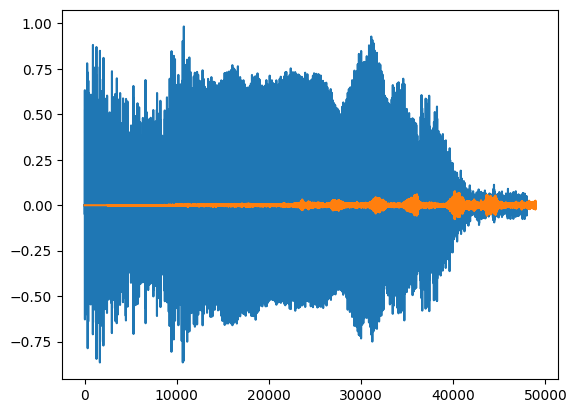

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()
#nwave -> not capuchin
#wave -> capuchin

# **Creating Tensorflow Dataset**

In [ ]:
POS = os.path.join('Parsed_Capuchinbird_Clips')
NEG = os.path.join('Parsed_Not_Capuchinbird_Clips')

In [ ]:
print(POS)

Parsed_Capuchinbird_Clips


In [ ]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [ ]:
print(pos)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


# **Adding Labels**

In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
print(data)

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [ ]:
lengths = []
for file in os.listdir(os.path.join('Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# **Converting to Spectogram**

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]


    padding_size = 48000 - tf.shape(wav)[0]


    zero_padding = tf.zeros([padding_size], dtype=tf.float32)


    wav = tf.concat([zero_padding, wav], 0)


    wav = tf.reshape(wav, [48000])

    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    return spectrogram, label



In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
print(filepath)

#Parsed capuchin bird clip selected

b'Parsed_Capuchinbird_Clips/XC3776-3.wav'


In [ ]:
spectrogram, label = preprocess(filepath, label)

In [ ]:
print(label)

1.0


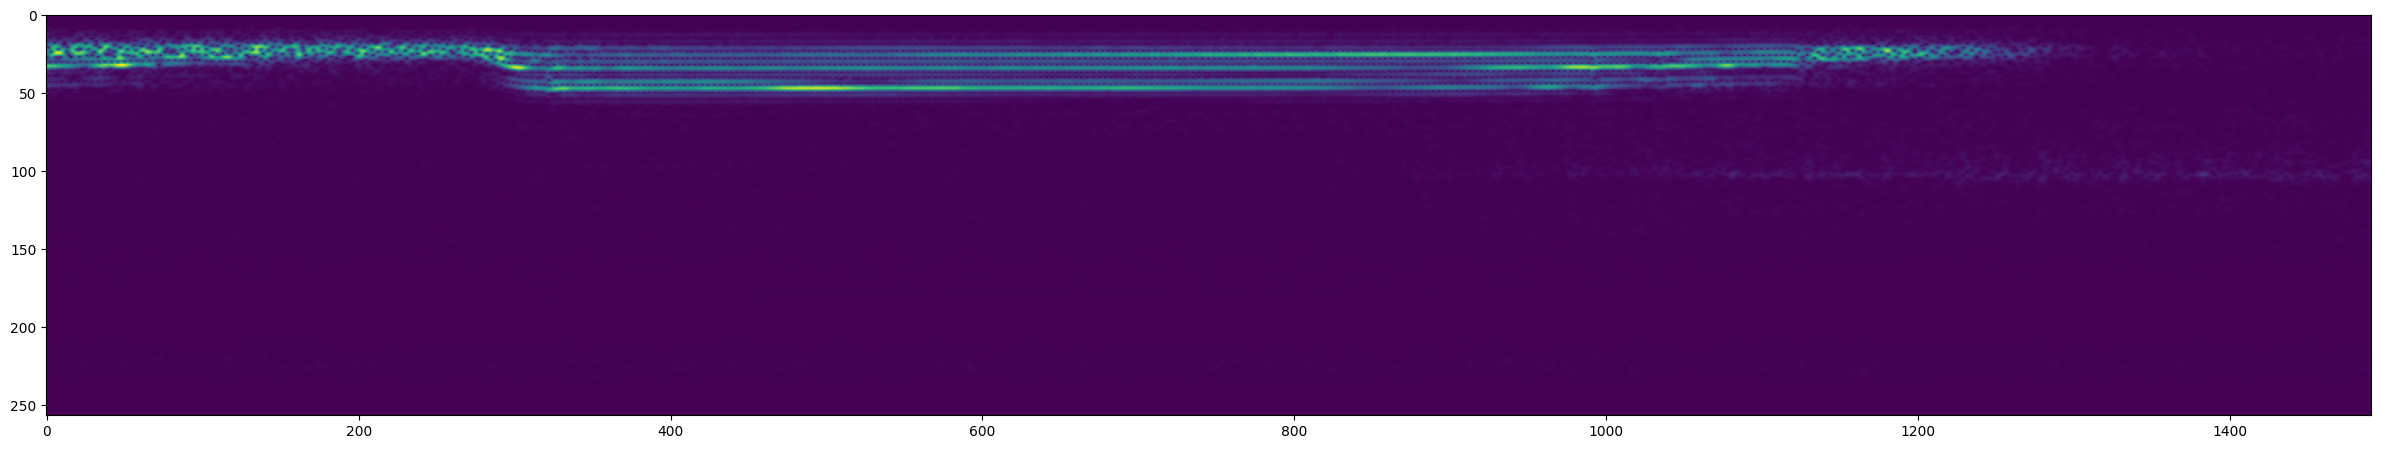

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

The above part was only for testing to see if it works or not


# **Creating Test and Train partitions**

In [ ]:
data = positives.concatenate(negatives)
data = data.map(lambda file_path, label: preprocess(file_path, label))
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

# **Test 1 Batch**

In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape

(16, 1491, 257, 1)

# **Building Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 1489, 255, 16)       │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1487, 253, 16)       │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6019376)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │     770,480,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 770,482,865 (2.87 GB)

 Trainable params: 770,482,865 (2.87 GB)

 Non-trainable params: 0 (0.00 B)

# **Fit Model & Train**

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - loss: 7.7540 - precision_1: 0.6957 - recall_1: 0.7337 - val_loss: 0.0754 - val_precision_1: 0.9808 - val_recall_1: 0.9444
Epoch 2/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1606 - precision_1: 0.9513 - recall_1: 0.9920 - val_loss: 0.0613 - val_precision_1: 0.9857 - val_recall_1: 1.0000
Epoch 3/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0540 - precision_1: 0.9961 - recall_1: 0.9887 - val_loss: 0.0635 - val_precision_1: 1.0000 - val_recall_1: 0.9839
Epoch 4/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0441 - precision_1: 1.0000 - recall_1: 0.9982 - val_loss: 0.0255 - val_precision_1: 1.0000 - val_recall_1: 1.0000


# **Prediction on a Single Clip**

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
import numpy as np

In [ ]:
y_test = [1 if prediction > 0.5 else 0 for prediction in y_test]

In [ ]:
print(y_test)
print(yhat)

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]


# **Building Forest Parsing Functions**

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2

    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('Forest_Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

13

# **Making Predictions**

In [ ]:
results = {}
for file in os.listdir(os.path.join('Forest_Recordings')):
    FILEPATH = os.path.join('Forest_Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)

    results[file] = yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]


In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()


# **Exporting Results**

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])